In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Exploratory Data Analysis

In [97]:
df_heart = pd.read_csv("heart_2020_cleaned.csv")

In [ ]:
Basic DataFrame Exploration

In [98]:
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Observations:
There are a mix of numeric and categorical columns
Heart Disease can be taken as the label column
Some columns may need encoding as they are categorical

In [99]:
df_heart.shape

(319795, 18)

In [100]:
df_heart.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [101]:
print(df_heart.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [103]:
df_heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [105]:
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


There are no missing rows.The column BMI may have upper side outliers 
There are 319795 rows and 18 columns


Value Counts of Category columns

In [108]:
for column in df_heart.select_dtypes(include=['object']):
    value_counts=df_heart[column].value_counts()
    print (f"Value count for {column}:\n{value_counts}\n")
    

Value count for HeartDisease:
No     292422
Yes     27373
Name: HeartDisease, dtype: int64

Value count for Smoking:
No     187887
Yes    131908
Name: Smoking, dtype: int64

Value count for AlcoholDrinking:
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

Value count for Stroke:
No     307726
Yes     12069
Name: Stroke, dtype: int64

Value count for DiffWalking:
No     275385
Yes     44410
Name: DiffWalking, dtype: int64

Value count for Sex:
Female    167805
Male      151990
Name: Sex, dtype: int64

Value count for AgeCategory:
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

Value count for Race:
White                             245212
Hispanic                           27446
Black                              2293

Data Visualisation

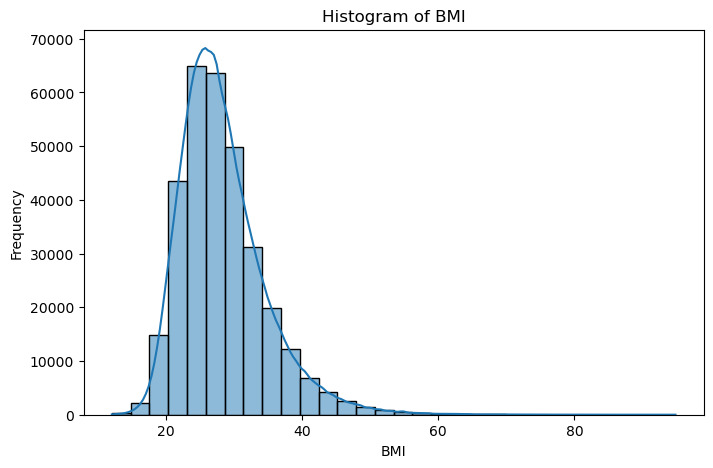

In [35]:
#Univariate histogram of BMI
plt.figure(figsize=(8,5))
sns.histplot(df_heart['BMI'],bins=30,kde='True')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

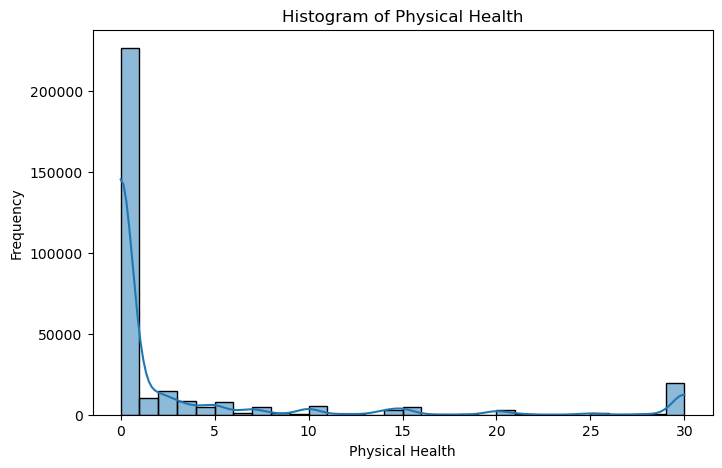

In [46]:
#Univariate histogram of Physical Health
plt.figure(figsize=(8,5))
sns.histplot(df_heart['PhysicalHealth'],bins=30,kde='True')
plt.title('Histogram of Physical Health')
plt.xlabel('Physical Health')
plt.ylabel('Frequency')
plt.show()


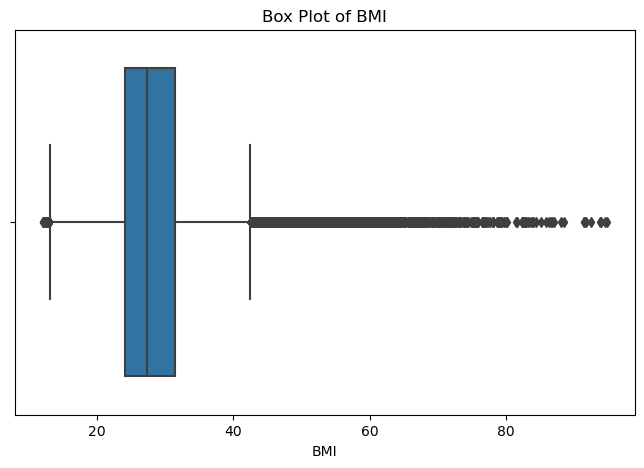

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_heart['BMI'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

<Figure size 2000x1000 with 0 Axes>

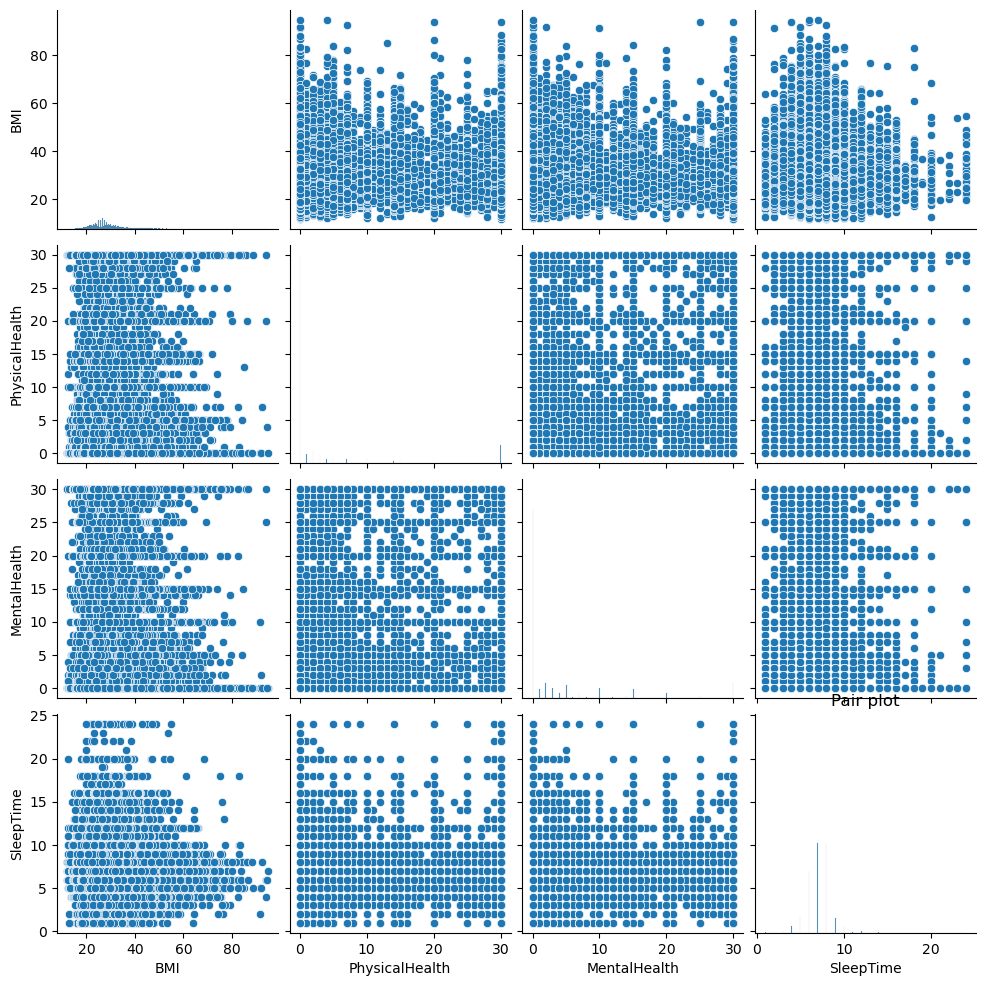

In [49]:

plt.figure(figsize=(8, 5))
sns.pairplot(df_heart)
plt.title('Pair plot')
plt.xlabel('')
plt.show()

In [ ]:
there are no columns to be droppped and no rows with missing values are there in the data set
BMI may have upper side outliers and few lower side outliers
With increase in BMI, Mental Health and Physical Health are seen decreasing


# Data Preprocessing

In [110]:
df_heart.shape

(319795, 18)

In [111]:
df_num=df_heart.select_dtypes('number')
df_num.shape

(319795, 4)

In [113]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [114]:
df_heart=df_heart[~((df_num<lower_bound)|(df_num>upper_bound)).any(axis=1)]

In [115]:
df_heart.shape

(231020, 18)

<Axes: xlabel='BMI'>

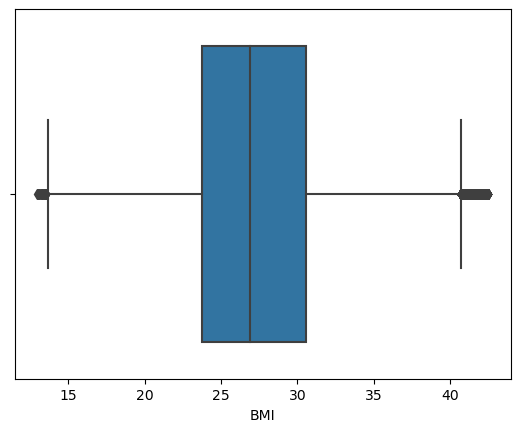

In [116]:
sns.boxplot(x=df2['BMI'])

In [117]:
df_num = df_heart.select_dtypes('number')
df_num.shape

(231020, 4)

In [118]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [119]:
df_heart=df_heart[~((df_num<lower_bound)|(df_num>upper_bound)).any(axis=1)]

In [120]:
df_heart.shape

(156575, 18)

In [122]:
X=df_heart.drop('HeartDisease',axis=1)
y=df_heart.HeartDisease
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
8,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No
11,28.71,Yes,No,No,0.0,0.0,No,Female,55-59,White,No,Yes,Very good,5.0,No,No,No


In [123]:
X_num=X.select_dtypes('number')
X_num.shape

(156575, 4)

In [124]:
X_cat=X.select_dtypes('object')
X_cat.shape

(156575, 13)

In [125]:
scaler=MinMaxScaler()
X_num_scaled=scaler.fit_transform(X_num)

In [126]:
X_num_scaled=pd.DataFrame(X_num_scaled,columns=X_num.columns,index=X_num.index)

In [127]:
X_num_scaled.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,156575.000000,156575.0,156575.0,156575.000000
mean,0.507168,0.0,0.0,0.525705
std,0.176391,0.0,0.0,0.138825
min,0.000000,0.0,0.0,0.000000
25%,0.379527,0.0,0.0,0.500000
50%,0.487435,0.0,0.0,0.500000
75%,0.617147,0.0,0.0,0.625000
max,1.000000,0.0,0.0,1.000000


In [128]:
X_cat_encoded=pd.get_dummies(X_cat,drop_first='False',dtype=int)


In [129]:
X=pd.concat([X_num_scaled,X_cat_encoded],axis=1)

In [130]:
X.shape,X_num_scaled.shape,X_cat_encoded.shape

((156575, 37), (156575, 4), (156575, 33))

In [92]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

PhysicalHealth                      0
MentalHealth                        0
SleepTime                           0
HeartDisease_Yes                    0
Smoking_Yes                         0
AlcoholDrinking_Yes                 0
Stroke_Yes                          0
DiffWalking_Yes                     0
Sex_Male                            0
AgeCategory_25-29                   0
AgeCategory_30-34                   0
AgeCategory_35-39                   0
AgeCategory_40-44                   0
AgeCategory_45-49                   0
AgeCategory_50-54                   0
AgeCategory_55-59                   0
AgeCategory_60-64                   0
AgeCategory_65-69                   0
AgeCategory_70-74                   0
AgeCategory_75-79                   0
AgeCategory_80 or older             0
Race_Asian                          0
Race_Black                          0
Race_Hispanic                       0
Race_Other                          0
Race_White                          0
Diabetic_No,

In [131]:
X.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
count,156575.000000,156575.0,156575.0,156575.000000,156575.000000,156575.000000,156575.000000,156575.000000,156575.000000,156575.000000,...,156575.000000,156575.000000,156575.000000,156575.000000,156575.000000,156575.000000,156575.000000,156575.000000,156575.000000,156575.000000
mean,0.507168,0.0,0.0,0.525705,0.385547,0.060699,0.027048,0.069168,0.536989,0.041973,...,0.107840,0.006227,0.813259,0.049580,0.269871,0.003347,0.393575,0.089740,0.025010,0.098349
std,0.176391,0.0,0.0,0.138825,0.486726,0.238779,0.162223,0.253741,0.498632,0.200529,...,0.310179,0.078666,0.389705,0.217076,0.443894,0.057753,0.488544,0.285809,0.156157,0.297787
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379527,0.0,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.487435,0.0,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.617147,0.0,0.0,0.625000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [133]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(125260, 37)
(31315, 37)
(125260,)
(31315,)


Observations after preprocessing
Outliers are removed
Numeric and categorical features have been separated into X and y, respectively.
Numeric columns have been rescaled (if required, this step is optional based on the algorithm used).
Category columns have been one-hot encoded to be used in the model.
The dataset has been split into train and test sets for model evaluation.

In [134]:
X.to_csv('HeartDisease_features.csv', index=False)
y.to_csv('HeartDisease_label.csv',index=False)